# 第4回講義 宿題

## 課題. MNISTデータセットを多層パーセプトロン(MLP)で学習せよ

### 注意
- homework関数を完成させて提出してください
    - 訓練データはtrain_X, train_y, テストデータはtest_Xで与えられます
    - train_Xとtrain_yをtrain_X, train_yとvalid_X, valid_yに分けるなどしてモデルを学習させてください
    - test_Xに対して予想ラベルpred_yを作り, homework関数の戻り値としてください\
- pred_yのtest_yに対する精度(F値)で評価します
- 全体の実行時間がiLect上で60分を超えないようにしてください
- homework関数の外には何も書かないでください (必要なものは全てhomework関数に入れてください)
- 解答提出時には Answer Cell の内容のみを提出してください

- MLPの実装にTensorflowなどのライブラリを使わないでください

### ヒント
- 出力yはone-of-k表現
- 最終層の活性化関数はソフトマックス関数, 誤差関数は多クラス交差エントロピー
- 最終層のデルタは教科書参照

次のセルのhomework関数を完成させて提出してください

# Answer Cell

In [7]:
def homework(train_X, train_y, test_X):
    
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))


    def deriv_sigmoid(x):
        return sigmoid(x)*(1-sigmoid(x))

    def softmax(x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)


    def deriv_softmax(x):
        return softmax(x)*(1-softmax(x))

    def test(W1, b1, W2, b2,W3,b3,x):

        # Forward Propagation Layer1
        u1 = np.matmul(x, W1) + b1
        z1 = sigmoid(u1)

        # Forward Propagation Layer2
        u2 = np.matmul(z1, W2) + b2
        z2 = sigmoid(u2)

        u3 = np.matmul(z2,W3) + b3
        z3 = softmax(u3)
        y =[]
        for one in z3:
            y.append(np.argmax(one))
        return y

    # Layer1 weights
    W1 = np.random.uniform(low=-0.08, high=0.08, size=(784, 100)).astype('float32')
    b1 = np.zeros(100).astype('float32')

    # Layer2 weights
    W2 = np.random.uniform(low=-0.08, high=0.08, size=(100, 50)).astype('float32')
    b2 = np.zeros(50).astype('float32')

    # Layer3 weights
    W3 = np.random.uniform(low=-0.08, high=0.08, size=(50, 10)).astype('float32')
    b3 = np.zeros(10).astype('float32')

    def train(W1, b1, W2, b2,W3,b3,x, t, eps=0.1):
        #global W1, b1, W2, b2,W3,b3  # to access variables that defined outside of this function.

        y_tmp = np.zeros(10).reshape(1, 10)
        y_tmp[0,t] = 1.0
        train_y=y_tmp
        # Forward Propagation Layer1
        u1 = np.matmul(x, W1) + b1
        z1 = sigmoid(u1)

        # Forward Propagation Layer2
        u2 = np.matmul(z1, W2) + b2
        z2 = sigmoid(u2)

        u3 = np.matmul(z2,W3) + b3
        z3 = softmax(u3)

        # Back Propagation (Cost Function: Negative Loglikelihood)
        y = z3
        #cost = np.sum(-t * np.log(y[0,t]) - (1 - t) * np.log(1 - y[0,t]))
        cost = -np.log(y[0,t])

        delta_3 = (y-train_y)
        delta_2 = deriv_sigmoid(u2) * np.matmul(delta_3, W3.T)  # Layer2 delta
        delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T)  # Layer1 delta

        # Update Parameters Layer1
        dW1 = np.matmul(x.T, delta_1)
        db1 = np.matmul(np.ones(len(x)), delta_1)
        W1 = W1 - eps * dW1
        b1 = b1 - eps * db1
        #W1 -= eps * dW1
        #b1 -= eps * db1

        # Update Parameters Layer2
        dW2 = np.matmul(z1.T, delta_2)
        db2 = np.matmul(np.ones(len(z1)), delta_2)
        W2 = W2 - eps * dW2
        b2 = b2 - eps * db2
        #W2 -= eps * dW2
        #b2 -= eps * db2

        # Update Parameters Layer3
        dW3 = np.matmul(z2.T, delta_3)
        db3 = np.matmul(np.ones(len(z2)), delta_3)
        W3 = W3 - eps * dW3
        b3 = b3 - eps * db3
        #W3 -= eps * dW3
        #b3 -= eps * db3

        return W1, b1, W2, b2,W3,b3,cost


    
    import time
    start=time.time()
    cost_plt =[]
    for epoch in range(30):
    # Online Learning
        cost_arry = []
        for x, y in zip(train_X, train_y):
            x = x.reshape(1,len(x))
            W1, b1, W2, b2,W3,b3,cost = train(W1, b1, W2, b2,W3,b3,x, y)
            cost_arry.append(cost)
            
        cost_plt.append(np.sum(cost_arry))
        tttttt = time.time() - start
        print ("epoch",epoch,"time",tttttt,"cost",cost_plt[len(cost_plt)-1])
    plt.plot(cost_plt)
    pred_y = test(W1, b1, W2, b2,W3,b3,test_X)
    return pred_y

- 以下のvalidate_homework関数を用いてエラーが起きないか動作確認をして下さい。
- 提出に際して、score_homework関数で60分で実行が終わることを確認して下さい。
- 評価は以下のscore_homework関数で行われますが、random_stateの値は変更されます。

# Checker Cell (for student)

In [8]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

import numpy as np

def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)

    mnist_X = mnist_X / 255.0

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
    train_X_mini = train_X[:100]
    train_y_mini = train_y[:100]
    test_X_mini = test_X[:100]
    test_y_mini = test_y[:100]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(test_y_mini, pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(test_y, pred_y, average='macro'))

epoch 0 time 0.03727245330810547 cost 1013.90465982
epoch 1 time 0.053232431411743164 cost 984.5424719
epoch 2 time 0.10013127326965332 cost 969.674228746
epoch 3 time 0.11575818061828613 cost 963.502217344
epoch 4 time 0.1535186767578125 cost 960.637905147
epoch 5 time 0.18477582931518555 cost 959.388465987
epoch 6 time 0.21602749824523926 cost 959.495991045
epoch 7 time 0.23817777633666992 cost 959.127046525
epoch 8 time 0.28661155700683594 cost 950.273388584
epoch 9 time 0.30568718910217285 cost 934.764640555
epoch 10 time 0.3384573459625244 cost 921.66277102
epoch 11 time 0.36971187591552734 cost 911.103962137
epoch 12 time 0.3853490352630615 cost 900.171784197
epoch 13 time 0.41660213470458984 cost 886.223229095
epoch 14 time 0.4387509822845459 cost 866.318676982
epoch 15 time 0.4851548671722412 cost 834.803597262
epoch 16 time 0.5062317848205566 cost 780.779613607
epoch 17 time 0.5389940738677979 cost 700.578786526
epoch 18 time 0.5546224117279053 cost 611.435494536
epoch 19 time

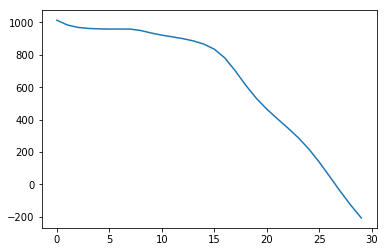

In [9]:
validate_homework()
# score_homework()

epoch 0 time 22.92143964767456 cost -505969.633256
epoch 1 time 45.310046911239624 cost -919177.476114
epoch 2 time 67.82321000099182 cost -1092145.2078
epoch 3 time 91.28193044662476 cost -1214675.65096
epoch 4 time 113.94001293182373 cost -1301586.37051
epoch 5 time 138.5729627609253 cost -1397203.70521
epoch 6 time 155.31579732894897 cost -1479169.09969
epoch 7 time 174.44799280166626 cost -1564625.90761
epoch 8 time 193.72227907180786 cost -1586381.61161
epoch 9 time 212.7437300682068 cost -1640825.26968
epoch 10 time 231.6416153907776 cost -1673584.52204
epoch 11 time 250.5393991470337 cost -1783391.28504
epoch 12 time 269.52527689933777 cost -1847203.24267
epoch 13 time 288.97904562950134 cost -1884956.20361
epoch 14 time 308.7818112373352 cost -1939952.46939
epoch 15 time 328.74332547187805 cost -1998391.24322
epoch 16 time 348.55844283103943 cost -2006978.73028
epoch 17 time 368.2886233329773 cost -2049279.69225
epoch 18 time 388.06792306900024 cost -2010810.46484
epoch 19 time

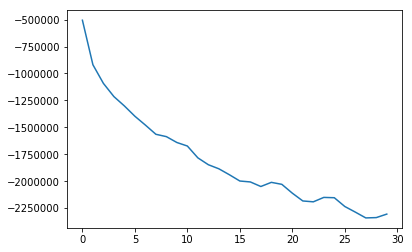

In [10]:
score_homework()